# Implementation

- Here we will compress an image of my dog Alice, using Singular Value Decomposition method, and reconstruct it using different numbers of singular values.

# 1 - Importing the image and converting to grayscale

- We import the necessary libraries and convert the image to greyscale. We also flip the image 90 degreees Clockwise as it was horizontal for some reason.

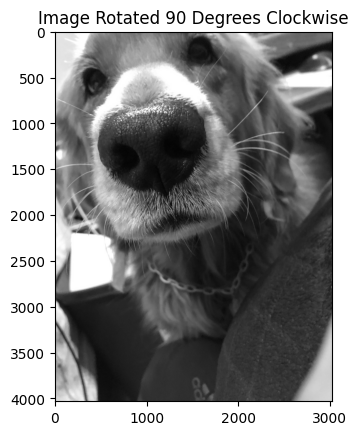

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image = Image.open('alice_pic1.jpg')


# Convert to grayscale (if necessary)
image_gray = image.convert('L')
image_gray = np.rot90(image_gray, k=-1)

# Convert the image to a numpy array
image_array = np.array(image_gray)



# Display the rotated image
plt.imshow(image_array, cmap='gray')
plt.title('Image Rotated 90 Degrees Clockwise')
plt.show()


# 2 - Perform Singular Value Decomposition

- we perform SVD on the image grayscale array, and display the singular values against index

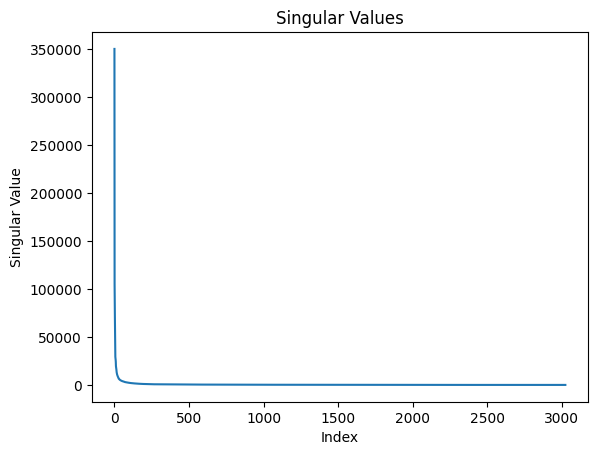

In [30]:
# Perform SVD
U, S, Vt = np.linalg.svd(image_array, full_matrices=False)

# Display the singular values
plt.plot(S)
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.show()


# 3 - Reconstructing the image

- We define a function that reconstruct an image given its U, S, Vt matricies, and the desired number of singular values(k). We then run it on the decomposed matrix from last step

- We print out the reconstructed image with k = 50

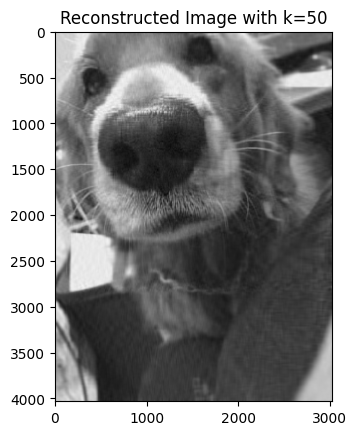

In [27]:
def reconstruct_image(U, S, Vt, k):
    # Keep only the top k singular values and vectors
    S_k = np.zeros((k, k))
    np.fill_diagonal(S_k, S[:k])
    
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    
    # Reconstruct the image
    image_reconstructed = np.dot(U_k, np.dot(S_k, Vt_k))
    
    return image_reconstructed

# Reconstruct the image with top 50 singular values
k = 50
image_reconstructed = reconstruct_image(U, S, Vt, k)

# Display the reconstructed image
plt.imshow(image_reconstructed, cmap='gray')
plt.title(f'Reconstructed Image with k={k}')
plt.show()


# 4 -  Mean Squared Error of reconstructed image

- We calculate the MSE of the reconstructed image, as visually the image seemed to be pretty accurate

In [28]:
from sklearn.metrics import mean_squared_error

image_reconstructed = np.array(image_reconstructed, dtype=np.uint8)
image_gray = np.array(image_gray, dtype=np.uint8)

# Calculate MSE between original and reconstructed image

mse = mean_squared_error(image_gray, image_reconstructed)
print(f'Mean Squared Error (MSE) for k={k}: {mse}')


Mean Squared Error (MSE) for k=50: 1045.9497355317512


# 5 - Clarity at different values of k

- Here we will experiment with different values of k, see how the clarity of the resconstructed image improves.

MSE for k=1: 2786.1175194566035


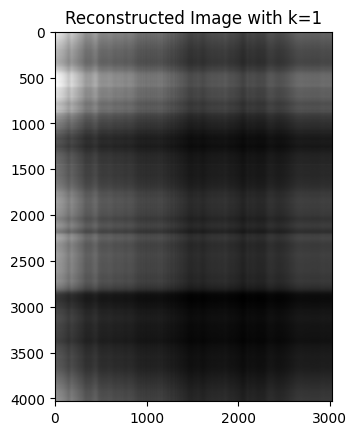

MSE for k=3: 1353.2587504372366


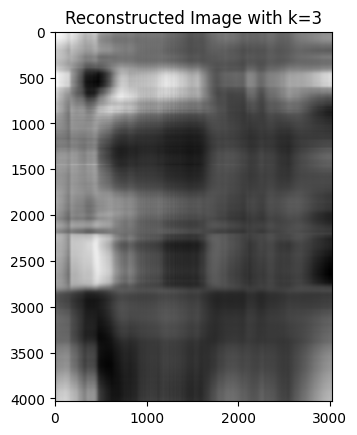

MSE for k=5: 684.0409627916106


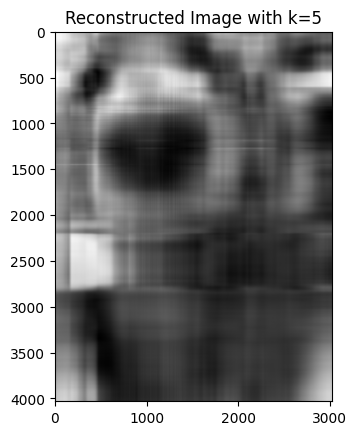

MSE for k=7: 507.52009170914096


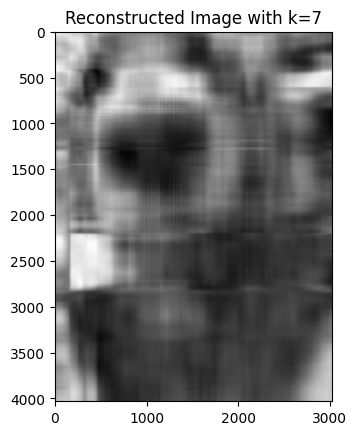

MSE for k=10: 339.3508014870311


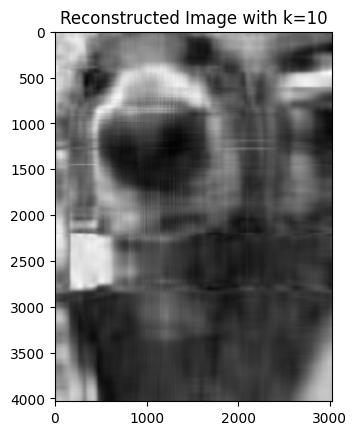

MSE for k=50: 68.48623608875447


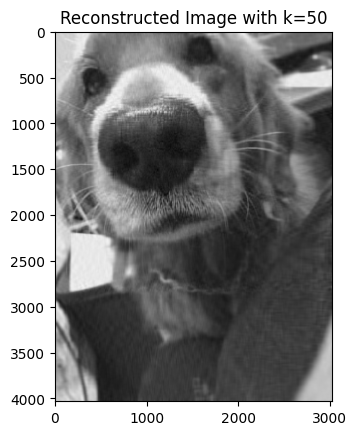

MSE for k=100: 31.038165700711506


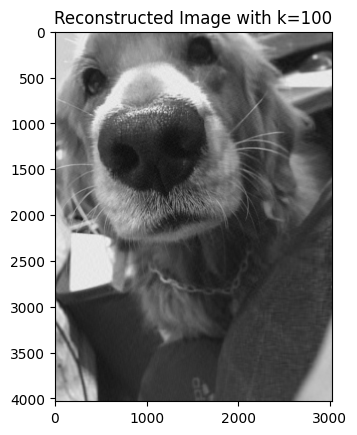

In [24]:
k_values = [1, 3, 5, 7, 10, 50, 100]

for k in k_values:
    image_reconstructed = reconstruct_image(U, S, Vt, k)
    mse = mean_squared_error(image_gray, image_reconstructed)
    print(f'MSE for k={k}: {mse}')
    
    # Display reconstructed images
    plt.imshow(image_reconstructed, cmap='gray')
    plt.title(f'Reconstructed Image with k={k}')
    plt.show()


** Remarks **

- Here we see clearly how as the number of singular values went up, Alice went from a blob of gray back to the absolute cutie she is.

- We also note that the MSE of the reconstructed images also dropped significantly as k increased, going from 2000+ down to about 30.

# Conclusion

- Singular Value Decomposition is a really powerful tool to be used in image processing. Just by manipulating the matrix representing the image, we were able to significantly reduce the memory cost of storing the full image, while retaining details to an acceptable level. As we reached k above 100, the difference from the full image is hardly noticable. 